In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw

In [23]:
def sigmak(lam, n, p, lmax):
    """
    Estimate for the bandwidth based on 
    - k = 0
    - lam: regularisation parameter
    - n: dataset size
    - p: dataset dimension
    - lmax: maximum distance between any two training observations (possibly sensitive to outliers)
    """
    if lam <= 2*n*np.exp(-3/2):
        return (np.sqrt(2)/np.pi)*(lmax/((n-1)**(1/p) - 1))*np.sqrt(1 - lambertw(-lam*np.sqrt(np.exp(1))/(2*n), 0))    
    new_lam =  2*n*np.exp(-3/2)
    return (np.sqrt(2)/np.pi)*(lmax/((n-1)**(1/p) - 1))*np.sqrt(1 - lambertw(-new_lam*np.sqrt(np.exp(1))/(2*n), 0))
sigmak = np.vectorize(sigmak)

/home/james/Repo/PhD Repo/time_series_clustering/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/james/Repo/PhD Repo/time_series_clustering/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


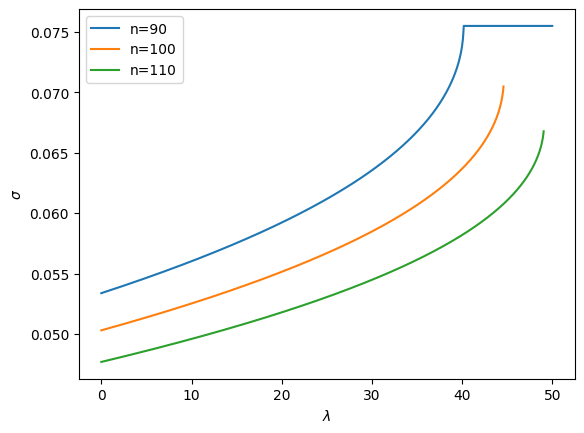

In [24]:
# Stability of sigma wrt lambda
lam = np.linspace(0, 50, 1000)

sig = sigmak(lam, 90, 2, 1)
plt.plot(lam, sig)

sig = sigmak(lam, 100, 2, 1)
plt.plot(lam, sig)

sig = sigmak(lam, 110, 2, 1)
plt.plot(lam, sig)

plt.xlabel("$\\lambda$")
plt.ylabel("$\\sigma$")
plt.legend([f"n={i}" for i in [90, 100, 110]])

# Model Build

In [26]:
from time_series.data_generators import LorenzGenerator
from time_series.time_series_models import KernelRidgeRegression
from time_series.data_handlers import TimeSeriesData
from time_series.kernels import JacobianGaussianKernel

2025-10-23 12:01:14.127 | INFO     | time_series.config:<module>:13 - PROJ_ROOT path is: /home/james/Repo/PhD Repo/time_series_clustering


In [27]:
t, data = LorenzGenerator(
    noise_covariance = 0,
    x0 = [1,1,1],
    rho=0.01,
    sigma=1,
    beta=0.05,
    T=10,
    dt=0.01
)()

In [28]:
data = TimeSeriesData(
    data[:-1, :],
    data[1:, :] ,
    train_val_test_split=[0.6, 0.2, 0.2]
)

In [29]:
X_train, y_train = data.train_data()

In [8]:
lam = 1e-8
model = KernelRidgeRegression(
    kernels=[
        JacobianGaussianKernel(),
        JacobianGaussianKernel(),
        JacobianGaussianKernel(),
    ],
    reg = lam,
    lag = 1
)

In [9]:
model.fit(X_train, y_train)

In [34]:
K = np.linalg.norm(X_train[np.newaxis, :] - X_train[:, np.newaxis], axis=2)

In [49]:
K_off_diag = K + np.diag(np.ones(K.shape[0])*np.inf)

In [54]:
np.median(K_off_diag.min(axis=0))

np.float64(0.0011566729960138932)